# Lattice Based Cryptography Example

In this mechanism of encryption, each message is represented as a point in a lattice. Although there are very hard lattice based problems, the basic idea in this particular case is pretty simple. The steps are:  
1. Choose n dimensional basis vectors
2. Choose a matrix with determinant +/- 1. 
3. Transform the basis by applying the previously selected matrix.
4. Compute the encrypted message in the new basis and add some error term. 
5. Decrypt using inverse of the selected and basis matrix.  

Below, we give a step by step example of this scheme.  

Encrypt the following message:   
>**Hi**

We can represent the message by two numbers, 8 and 9, which is the position of the characters in the alphabet.
Now, we must select two linearly independent vectors which would serve as the basis of our lattice. Let's take $[0, 1]$ and $[1, 1]$. Then the basis matrix would look like: 
$$
B=
  \begin{bmatrix}
    0 & 1\\
    1 & 1
  \end{bmatrix}$$
Which also has an inverse: 
$$
B^{-1}=
  \begin{bmatrix}
    -1 & 1\\
    1 & 0
  \end{bmatrix}$$
At this point, it would be helpful to visualize the basis vectors:


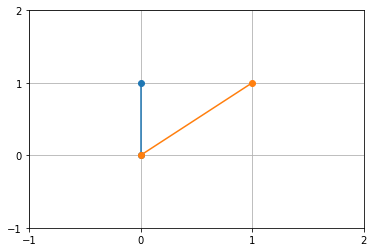

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([0, 0], [0, 1], '-o')
plt.plot([0, 1], [0, 1], '-o')
plt.grid()
plt.xticks(np.arange(-1 , 3 , 1.0));
plt.yticks(np.arange(-1  , 3 , 1.0));

Now, using this basis vectors we can create a lattice which looks like the following image. The details have been explained in this link: https://github.com/hasanIqbalAnik/jupyter-notebooks/blob/master/Visualizations.ipynb
<img src='lattice.png' width="300px" height="300px">

The message we are trying to send would be represented in our lattice as:

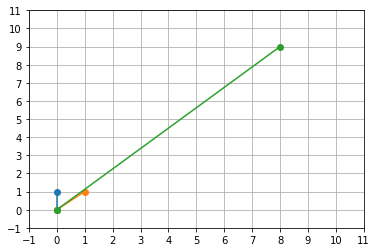

In [65]:
plt.plot([0, 0], [0, 1], '-o') # basis 1
plt.plot([0, 1], [0, 1], '-o') # basis 2
plt.plot([0, 8], [0, 9], '-o') # message vector
plt.grid()
plt.xticks(np.arange(-1 , 12 , 1.0));
plt.yticks(np.arange(-1  , 12 , 1.0));


At this point, we would choose a matrix $U$ which has a determinant of $\pm1$. This would transform our basis vectors and consequently the message vector into another basis.  
$$
U=
  \begin{bmatrix}
    3 & 7\\
    2 & 5
  \end{bmatrix}
$$
And it's inverse would be: 
$$
U^{-1}=
  \begin{bmatrix}
    5 & -7\\
    -2 & 3
  \end{bmatrix}
$$

To transform the basis of the lattice, we compute: 
$$
B' = UB = 
\begin{bmatrix}
    7 & 10\\
    5 & 7
  \end{bmatrix}
$$
Now, to encrypt the message, first we have to multiply the message with the new matrix and add an random small error term:
$$
c = [8, 9] * \begin{bmatrix} 7 & 10 \\ 5 & 7 \end{bmatrix} + [.1, .1] = [101, 143] + [.1, .1] = [101.1,141.1]
$$

The error terms should be selected carefully, else the message might be indecipherable. Let's see how our transformed vector and message looks like:



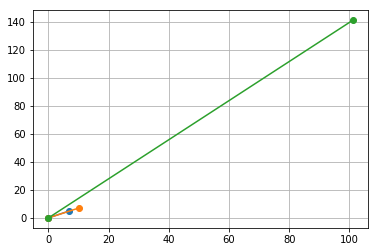

In [67]:
plt.plot([0, 7], [0, 5], '-o') # basis 1
plt.plot([0, 10], [0, 7], '-o') # basis 2
plt.plot([0, 101.1], [0, 141.1], '-o') # encrypted message vector
plt.grid()



Now to decrypt the message, we have to computer: 
$$
p' = c * B^{-1} = [42, 101.1]
$$
After rounding the decimal terms to the nearest integer, we finally find the plaintext:
$$
p = p' * U^{-1} = [8, 9]
$$
Which was our original message.   
(REF: https://en.wikipedia.org/wiki/GGH_encryption_scheme)  